# Association Rule Mining

먼저 필요한 라이브러리를 설치해야 한다.<br><br>
사전 설치가 필요한 Library 리스트<br>
- pip install pandas: 데이터프레임 처리 라이브러리<br>
- pip install mlxtend: 연관 규칙 분석 라이브러리<br>
- pip install pytagcloud: 아래 2개와 함께 워드클라우드 생성에 필요한 라이브러리
- pip install pygame
- pip install simplejson

분석에 필요한 라이브러리를 불러온다.

In [2]:
import pandas as pd
import mlxtend

In [20]:
!pip install pytagcloud

  Stored in directory: C:\Users\kcb\AppData\Local\pip\Cache\wheels\08\bf\d4\8899fd82d7f62af5960d17cc59b80edae474380b92828c8c1f
Successfully built pytagcloud


<br>

# 1. 강의 예제 데이터 분석

## 데이터 처리

이 실습에서는 강의 자료 예제 데이터를 분석한다.<br>
먼저 강의 자료 예제 데이터를 생성한다.

In [3]:
dataset = [['egg', 'noodle', 'tuna'],
           ['noodle', 'rice'],
           ['noodle', 'cola'],
           ['egg', 'noodle', 'rice'],
           ['egg', 'cola'],
           ['noodle', 'cola'],
           ['noodle', 'rice'],
           ['egg', 'noodle', 'cola', 'tuna'],
           ['egg', 'noodle', 'cola'],
           ['onion']]

mlxtend는 True/False로 표현된 transaction 데이터프레임을 입력으로 받는다.<br>
dataset을 입력 형태에 맞게 True/False transaction 데이터프레임 df로 변환한다.<br>
- te: 데이터를 True/False transaction 형태로 변환해주는 인코더
- te_ary: transaction encoder를 이용해 변환한 array 형태의 transaction 데이터
- df: 데이터프레임 형태의 transaction 데이터

In [4]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_) #데이터프레임으로 변경

In [4]:
te_ary

array([[False,  True,  True, False, False,  True],
       [False, False,  True, False,  True, False],
       [ True, False,  True, False, False, False],
       [False,  True,  True, False,  True, False],
       [ True,  True, False, False, False, False],
       [ True, False,  True, False, False, False],
       [False, False,  True, False,  True, False],
       [ True,  True,  True, False, False,  True],
       [ True,  True,  True, False, False, False],
       [False, False, False,  True, False, False]])

In [5]:
df

,cola,egg,noodle,onion,rice,tuna
0,False,True,True,False,False,True
1,False,False,True,False,True,False
2,True,False,True,False,False,False
3,False,True,True,False,True,False
4,True,True,False,False,False,False
5,True,False,True,False,False,False
6,False,False,True,False,True,False
7,True,True,True,False,False,True
8,True,True,True,False,False,False
9,False,False,False,True,False,False


<br>

## 연관 규칙 분석 모델링

## 연관 규칙 분석 Step1: 최소 지지도 조건 부여

빈발 아이템셋을 구축하기 위한 min_support를 0.2로 설정한다.<br>
==> min_support = 0.2

<br>

## 연관 규칙 분석 Step2: 빈발 집합 생성

apriori 알고리즘으로 최소 지지도 조건을 만족하는 빈발 아이템 집합을 생성한다.<br><br>
mlxtend.frequent_patterns.apriori 함수의 옵션은 다음과 같다.<br>
- min_support: 빈발 아이템셋을 구축하기 위한 0~1 사이의 최소 support. 디폴트는 0.5.
- use_colnames: 결과 반환시 item의 이름 표기 여부. 디폴트는 False이고 숫자로 표기됨.

In [6]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.5,(cola)
1,0.5,(egg)
2,0.8,(noodle)
3,0.3,(rice)
4,0.2,(tuna)
5,0.3,"(cola, egg)"
6,0.4,"(noodle, cola)"
7,0.4,"(noodle, egg)"
8,0.2,"(tuna, egg)"
9,0.3,"(noodle, rice)"


<br>

## 연관 규칙 분석 Step3: 규칙 평가 수행

연관성 규칙 평가에 필요한 함수를 불러온다.

In [7]:
from mlxtend.frequent_patterns import association_rules

mlxtend.frequent_patterns.association_rules 함수의 옵션은 다음과 같다.<br>
- metric: 규칙 평가에 사용되는 기준으로 ['support', 'confidence', 'lift'] 중 선택. 디폴트는 'confidence'.
- min_threshold: metric의 기준값. 디폴트는 0.8.

rule1: 위에서 구한 빈발 아이템 집합을 이용하여 confidence가 0.7 이상인 연관 규칙을 찾는다.

In [8]:
rules1 = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(cola),(noodle),0.5,0.8,0.4,0.8,1.00,0.00,1.0
1,(egg),(noodle),0.5,0.8,0.4,0.8,1.00,0.00,1.0
2,(tuna),(egg),0.2,0.5,0.2,1.0,2.00,0.10,inf
3,(rice),(noodle),0.3,0.8,0.3,1.0,1.25,0.06,inf
4,(tuna),(noodle),0.2,0.8,0.2,1.0,1.25,0.04,inf
5,"(noodle, tuna)",(egg),0.2,0.5,0.2,1.0,2.00,0.10,inf
6,"(tuna, egg)",(noodle),0.2,0.8,0.2,1.0,1.25,0.04,inf
7,(tuna),"(noodle, egg)",0.2,0.4,0.2,1.0,2.50,0.12,inf


<br>
rule2: 위에서 구한 빈발 아이템 집합을 이용하여 lift가 2 이상인 연관 규칙을 찾는다.

In [9]:
rules2 = association_rules(frequent_itemsets, metric="lift", min_threshold=2)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(tuna),(egg),0.2,0.5,0.2,1.0,2.0,0.10,inf
1,(egg),(tuna),0.5,0.2,0.2,0.4,2.0,0.10,1.333333
2,"(noodle, tuna)",(egg),0.2,0.5,0.2,1.0,2.0,0.10,inf
3,"(noodle, egg)",(tuna),0.4,0.2,0.2,0.5,2.5,0.12,1.600000
4,(tuna),"(noodle, egg)",0.2,0.4,0.2,1.0,2.5,0.12,inf
5,(egg),"(noodle, tuna)",0.5,0.2,0.2,0.4,2.0,0.10,1.333333


<br>
rule3: 위의 규칙들을 기반으로 Confidence가 0.7이상, lift가 2 이상인 규칙을 찾는다.

In [10]:
rules3 = rules2[(rules2['confidence'] >= 0.7) & (rules2['lift'] >= 2)]
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(tuna),(egg),0.2,0.5,0.2,1.0,2.0,0.10,inf
2,"(noodle, tuna)",(egg),0.2,0.5,0.2,1.0,2.0,0.10,inf
4,(tuna),"(noodle, egg)",0.2,0.4,0.2,1.0,2.5,0.12,inf


<br>
rules4: 조건절 아이템의 개수가 2개 이상, Confidence가 0.7이상, lift가 2 이상인 규칙을 찾는다.<br><br>
조건절의 아이템 개수를 이용하여 규칙을 필터링 할 수 있도록, 조건절 아이템 개수를 구하여 규칙 데이터프레임에 추가한다.

In [11]:
# 아이템 개수 정보를 갖는 열 추가
rules2["antecedents_len"] = rules2["antecedents"].apply(lambda x: len(x))
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_len
0,(tuna),(egg),0.2,0.5,0.2,1.0,2.0,0.10,inf,1
1,(egg),(tuna),0.5,0.2,0.2,0.4,2.0,0.10,1.333333,1
2,"(noodle, tuna)",(egg),0.2,0.5,0.2,1.0,2.0,0.10,inf,2
3,"(noodle, egg)",(tuna),0.4,0.2,0.2,0.5,2.5,0.12,1.600000,2
4,(tuna),"(noodle, egg)",0.2,0.4,0.2,1.0,2.5,0.12,inf,1
5,(egg),"(noodle, tuna)",0.5,0.2,0.2,0.4,2.0,0.10,1.333333,1


위에서 추가한 정보를 바탕으로 조건절 아이템의 개수가 2개 이상, Confidence가 0.7이상, lift가 2 이상인 규칙을 출력한다.

In [12]:
rules4 = rules2[(rules2['antecedents_len'] >= 2) & (rules2['confidence'] >= 0.7) & (rules2['lift'] >= 2)]
rules4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_len
2,"(noodle, tuna)",(egg),0.2,0.5,0.2,1.0,2.0,0.1,inf,2


<br><br>
# 2. 실제 장바구니 데이터 분석

## 데이터 처리

이 실습에서는 실제 장바구니 데이터를 분석한다.<br>
먼저 분석할 장바구니 데이터 파일을 불러온다.

In [13]:
transaction = open('./data/groceries.csv','r').readlines()
len(transaction)

9835

In [14]:
transaction[0]

'citrus fruit,semi-finished bread,margarine,ready soups\n'

불러온 transaction 데이터는 위와 같이 아이템 전체가 하나의 string 형태로 되어 있으므로 위의 강의 자료 예시에서 분석한 리스트와 같이 변형한다.

In [15]:
# transaction 데이터 변형
gloceries = []
for line in transaction:
    line = line.replace('\n','').split(',')
    gloceries.append(line)
len(gloceries) # 불러온 데이터 수 확인

9835

In [16]:
gloceries[0]

['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups']

분석에 필요한 라이브러리를 로드한다.

In [21]:
from collections import Counter
import pytagcloud
import itertools

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


불러온 데이터의 특징을 파악하기 위해 Word Cloud를 그려 빈도가 높은 아이템을 확인한다.

In [22]:
nouns = list(itertools.chain(*gloceries))
count = Counter(nouns)
tag2 = count.most_common(100)
taglist = pytagcloud.make_tags(tag2, maxsize=80)
pytagcloud.create_tag_image(taglist, './wordcloud.jpg', size=(1024, 768), fontname='Coustard', rectangular=False)

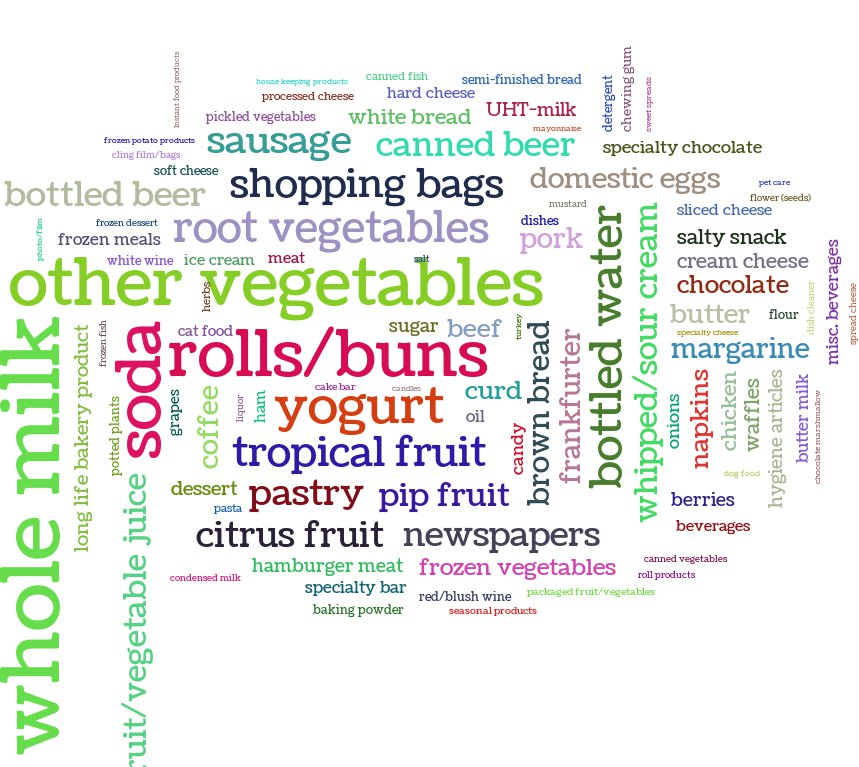

In [17]:
from IPython.display import Image

Image("./wordcloud.jpg")

위의 강의 자료 예제 분석과 동일하게 데이터셋을 입력 형태에 맞게 True/False transaction 데이터프레임 df로 변환한다.

In [23]:
te = TransactionEncoder()
te_ary = te.fit(gloceries).transform(gloceries)
df = pd.DataFrame(te_ary, columns=te.columns_) #데이터프레임으로 변경

head 함수를 이용해 변형된 데이터를 확인한다.

In [24]:
df.head() #head 함수는 최초 5개의 데이터를 출력해준다.

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


<br>

## 연관 규칙 분석 모델링

## 연관 규칙 분석 Step1: 최소 지지도 조건 부여

빈발 아이템셋을 구축하기 위한 min_support를 0.2로 설정한다.<br>
==> min_support = 0.01

<br>

## 연관 규칙 분석 Step2: 빈발 집합 생성

apriori 알고리즘으로 최소 지지도 조건을 만족하는 빈발 아이템 집합을 생성한다.

In [25]:
frequent_itemsets = apriori(df, use_colnames=True, min_support=0.01)
frequent_itemsets.head()

,support,itemsets
0,0.033452,(UHT-milk)
1,0.017692,(baking powder)
2,0.052466,(beef)
3,0.033249,(berries)
4,0.026029,(beverages)


<br>

## 연관 규칙 분석 Step3: 규칙 평가 수행

<br>
rule1: 위에서 구한 빈발 아이템 집합을 이용하여 confidence가 0.3 이상인 연관 규칙을 찾는다.

In [26]:
rules1 = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(beef),(other vegetables),0.052466,0.193493,0.019725,0.375969,1.943066,0.009574,1.292416
1,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,0.011668,1.332628
2,(beef),(whole milk),0.052466,0.255516,0.021251,0.405039,1.585180,0.007845,1.251315
3,(berries),(other vegetables),0.033249,0.193493,0.010269,0.308869,1.596280,0.003836,1.166938
4,(berries),(whole milk),0.033249,0.255516,0.011795,0.354740,1.388328,0.003299,1.153774
5,(berries),(yogurt),0.033249,0.139502,0.010574,0.318043,2.279848,0.005936,1.261807
6,(bottled water),(whole milk),0.110524,0.255516,0.034367,0.310948,1.216940,0.006126,1.080446
7,(brown bread),(whole milk),0.064870,0.255516,0.025216,0.388715,1.521293,0.008641,1.217899
8,(butter),(other vegetables),0.055414,0.193493,0.020031,0.361468,1.868122,0.009308,1.263065
9,(butter),(whole milk),0.055414,0.255516,0.027555,0.497248,1.946053,0.013395,1.480817


confidence를 기준으로 상위 10개의 규칙을 내림차순으로 표시해 confidence가 높은 연관 규칙을 살펴본다.

In [27]:
rules1.sort_values('confidence',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
73,"(root vegetables, citrus fruit)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059
95,"(root vegetables, tropical fruit)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,0.008231,1.941244
79,"(curd, yogurt)",(whole milk),0.017285,0.255516,0.010066,0.582353,2.279125,0.005649,1.782567
72,"(butter, other vegetables)",(whole milk),0.020031,0.255516,0.011490,0.573604,2.244885,0.006371,1.745992
118,"(root vegetables, tropical fruit)",(whole milk),0.021047,0.255516,0.011998,0.570048,2.230969,0.006620,1.731553
119,"(root vegetables, yogurt)",(whole milk),0.025826,0.255516,0.014540,0.562992,2.203354,0.007941,1.703594
82,"(domestic eggs, other vegetables)",(whole milk),0.022267,0.255516,0.012303,0.552511,2.162336,0.006613,1.663694
123,"(whipped/sour cream, yogurt)",(whole milk),0.020742,0.255516,0.010880,0.524510,2.052747,0.005580,1.565719
115,"(root vegetables, rolls/buns)",(whole milk),0.024301,0.255516,0.012710,0.523013,2.046888,0.006500,1.560804
88,"(pip fruit, other vegetables)",(whole milk),0.026131,0.255516,0.013523,0.517510,2.025351,0.006846,1.543003


<br>
rule2: 위에서 구한 빈발 아이템 집합을 이용하여 lift가 3 이상인 연관 규칙을 찾는다.

In [28]:
rules2 = association_rules(frequent_itemsets, metric="lift", min_threshold=3)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(root vegetables),(beef),0.108998,0.052466,0.017387,0.159515,3.040367,0.011668,1.127366
1,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,0.011668,1.332628
2,"(root vegetables, citrus fruit)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059
3,"(citrus fruit, other vegetables)",(root vegetables),0.028876,0.108998,0.010371,0.359155,3.295045,0.007224,1.390354
4,(root vegetables),"(citrus fruit, other vegetables)",0.108998,0.028876,0.010371,0.095149,3.295045,0.007224,1.073242
5,(other vegetables),"(root vegetables, citrus fruit)",0.193493,0.017692,0.010371,0.053600,3.029608,0.006948,1.037941
6,"(yogurt, whole milk)",(curd),0.056024,0.053279,0.010066,0.179673,3.372304,0.007081,1.154078
7,(curd),"(yogurt, whole milk)",0.053279,0.056024,0.010066,0.188931,3.372304,0.007081,1.163866
8,"(root vegetables, tropical fruit)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,0.008231,1.941244
9,"(tropical fruit, other vegetables)",(root vegetables),0.035892,0.108998,0.012303,0.342776,3.144780,0.008391,1.355705


<br>
rule3: 위의 규칙들을 기반으로 Confidence가 0.3이상, lift가 3 이상인 규칙을 찾는다.

In [29]:
rules3 = rules2[(rules2['confidence'] >= 0.3) & (rules2['lift'] >= 3)]
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,0.011668,1.332628
2,"(root vegetables, citrus fruit)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059
3,"(citrus fruit, other vegetables)",(root vegetables),0.028876,0.108998,0.010371,0.359155,3.295045,0.007224,1.390354
8,"(root vegetables, tropical fruit)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,0.008231,1.941244
9,"(tropical fruit, other vegetables)",(root vegetables),0.035892,0.108998,0.012303,0.342776,3.144780,0.008391,1.355705


<br>
rules4: 조건절 아이템의 개수가 2개 이상, Confidence가 0.3이상, lift가 3 이상인 규칙을 찾는다.<br><br>
조건절의 아이템 개수를 이용하여 규칙을 필터링 할 수 있도록, 조건절 아이템 개수를 구하여 규칙 데이터프레임에 추가한다.

In [30]:
# 아이템 개수 정보를 갖는 열 추가
rules2["antecedents_len"] = rules2["antecedents"].apply(lambda x: len(x))
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_len
0,(root vegetables),(beef),0.108998,0.052466,0.017387,0.159515,3.040367,0.011668,1.127366,1
1,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,0.011668,1.332628,1
2,"(root vegetables, citrus fruit)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059,2
3,"(citrus fruit, other vegetables)",(root vegetables),0.028876,0.108998,0.010371,0.359155,3.295045,0.007224,1.390354,2
4,(root vegetables),"(citrus fruit, other vegetables)",0.108998,0.028876,0.010371,0.095149,3.295045,0.007224,1.073242,1
5,(other vegetables),"(root vegetables, citrus fruit)",0.193493,0.017692,0.010371,0.053600,3.029608,0.006948,1.037941,1
6,"(yogurt, whole milk)",(curd),0.056024,0.053279,0.010066,0.179673,3.372304,0.007081,1.154078,2
7,(curd),"(yogurt, whole milk)",0.053279,0.056024,0.010066,0.188931,3.372304,0.007081,1.163866,1
8,"(root vegetables, tropical fruit)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,0.008231,1.941244,2
9,"(tropical fruit, other vegetables)",(root vegetables),0.035892,0.108998,0.012303,0.342776,3.144780,0.008391,1.355705,2


위에서 추가한 정보를 바탕으로 조건절 아이템의 개수가 2개 이상, Confidence가 0.3이상, lift가 3 이상인 규칙을 출력한다.

In [31]:
rules4 = rules2[(rules2['antecedents_len'] >= 2) & (rules2['confidence'] >= 0.3) & (rules2['lift'] >= 3)]
rules4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_len
2,"(root vegetables, citrus fruit)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059,2
3,"(citrus fruit, other vegetables)",(root vegetables),0.028876,0.108998,0.010371,0.359155,3.295045,0.007224,1.390354,2
8,"(root vegetables, tropical fruit)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,0.008231,1.941244,2
9,"(tropical fruit, other vegetables)",(root vegetables),0.035892,0.108998,0.012303,0.342776,3.144780,0.008391,1.355705,2
